In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 이해 및 탐색

In [34]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [35]:
names = iris["target_names"].tolist()
# df['species'] = df['target'].map({0: names[0], 1: names[1], 2: names[2]})
names

['setosa', 'versicolor', 'virginica']

In [36]:
# 데이터 샘플
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
# 데이터 요약
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [38]:
# 클래스 분포
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

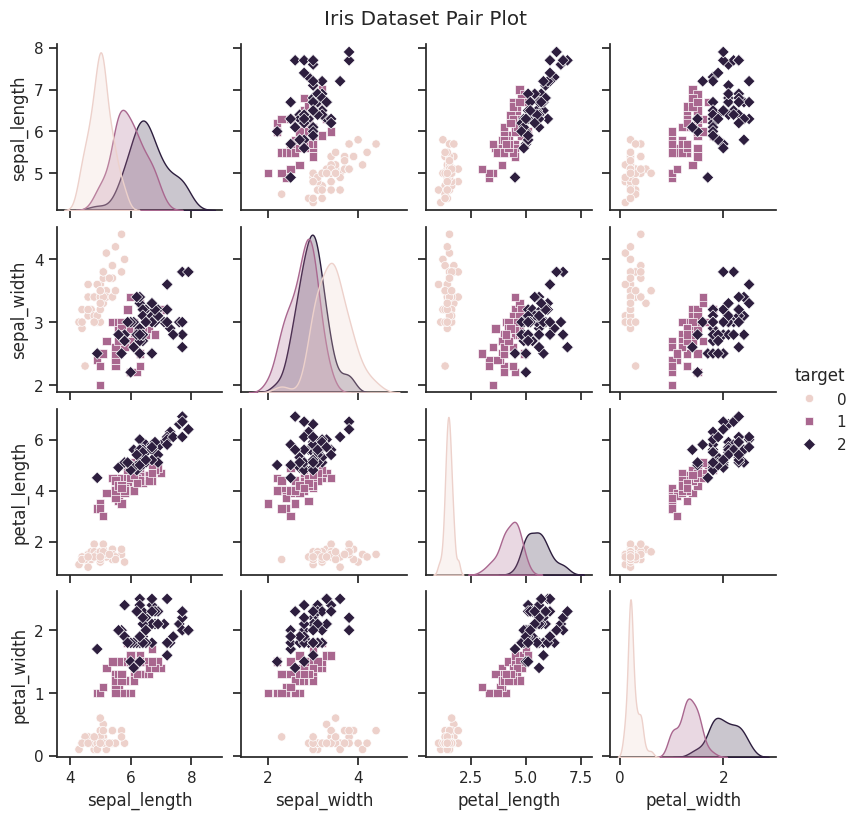

In [56]:
sns.set(style="ticks")
sns.pairplot(df, hue='target', markers=["o", "s", "D"], height=2, aspect=1)
plt.suptitle("Iris Dataset Pair Plot", y=1.02)  # 그래프 제목 추가
plt.show()

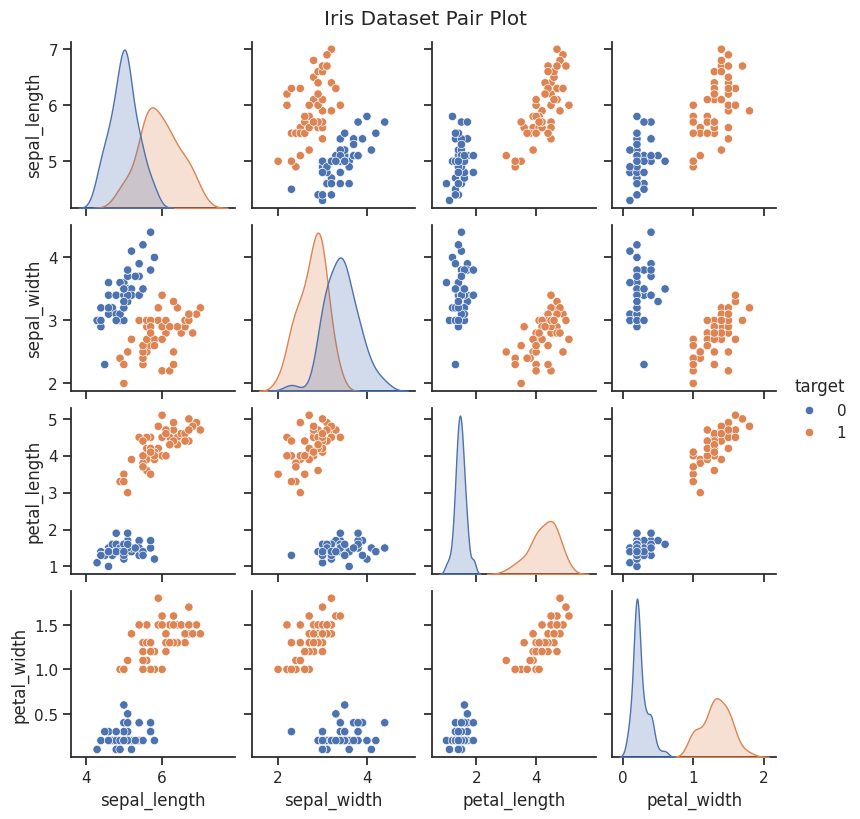

In [60]:
filtered_df = df[df['target'].isin([0, 1])]
sns.set(style="ticks")
sns.pairplot(filtered_df, hue='target', height=2, aspect=1)
plt.suptitle("Iris Dataset Pair Plot", y=1.02)  # 그래프 제목 추가
plt.show()

# 데이터 전처리

In [42]:
# 결측치 확인
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [43]:
# 피처 이름 정리 (공백 제거)
df.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in df.columns]

In [44]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 피처 엔지니어링

In [61]:
# 예: petal 길이와 너비의 비율 추가
df['petal_ratio'] = df['petal_length'] / df['petal_width']
df['sepal_ratio'] = df['sepal_length'] / df['sepal_width']

# 데이터 분할 (데이터, 레이블)

In [62]:
X = df.drop('target', axis=1)
y = df['target']

# 표준화

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
pd.DataFrame(X_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,150.0,-4.736952e-16,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
1,150.0,-7.815970e-16,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
2,150.0,-4.263256e-16,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
3,150.0,-4.736952e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096
4,150.0,4.736952e-17,1.00335,-0.880776,-0.607785,-0.407240,0.143538,4.307962
5,150.0,5.684342e-16,1.00335,-1.717149,-1.020920,0.196949,0.679530,2.525054


# 훈련/검증 세트 분할

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 모델링

In [70]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 성능 평가

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



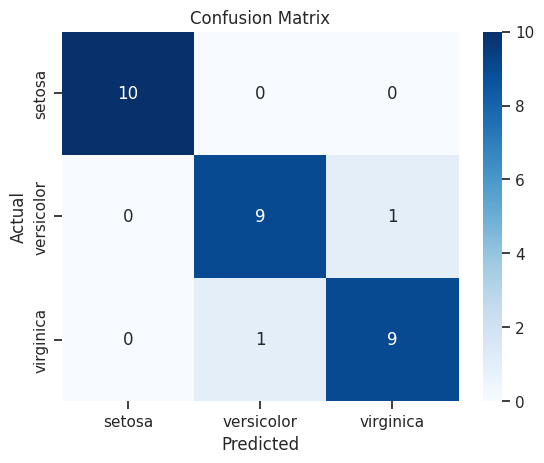

In [73]:
# 혼동 행렬
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()